In [218]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [219]:
# load data
h1_df = pd.read_csv('../../data/H1.csv')
h2_df = pd.read_csv('../../data/H2.csv')

**Overview**

In [220]:
h1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40060 entries, 0 to 40059
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   40060 non-null  int64  
 1   LeadTime                     40060 non-null  int64  
 2   ArrivalDateYear              40060 non-null  int64  
 3   ArrivalDateMonth             40060 non-null  object 
 4   ArrivalDateWeekNumber        40060 non-null  int64  
 5   ArrivalDateDayOfMonth        40060 non-null  int64  
 6   StaysInWeekendNights         40060 non-null  int64  
 7   StaysInWeekNights            40060 non-null  int64  
 8   Adults                       40060 non-null  int64  
 9   Children                     40060 non-null  int64  
 10  Babies                       40060 non-null  int64  
 11  Meal                         40060 non-null  object 
 12  Country                      39596 non-null  object 
 13  MarketSegment   

In [221]:
h2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   79330 non-null  int64  
 1   LeadTime                     79330 non-null  int64  
 2   ArrivalDateYear              79330 non-null  int64  
 3   ArrivalDateMonth             79330 non-null  object 
 4   ArrivalDateWeekNumber        79330 non-null  int64  
 5   ArrivalDateDayOfMonth        79330 non-null  int64  
 6   StaysInWeekendNights         79330 non-null  int64  
 7   StaysInWeekNights            79330 non-null  int64  
 8   Adults                       79330 non-null  int64  
 9   Children                     79326 non-null  float64
 10  Babies                       79330 non-null  int64  
 11  Meal                         79330 non-null  object 
 12  Country                      79306 non-null  object 
 13  MarketSegment   

We have two datasets and both datasets share the same structure with 31 variables
1. ***h1_df*** (*Resort Hotel* -Portugal/Algarve-): 40,060 observations
2. ***h2_df*** (*City Hotel* -Portugal/Lisbon-): 79,330 observations

* Each observation represents a hotel booking. 
* Both datasets comprehend bookings due to arrive between the 1st of July of 2015 and the 31st of August 2017, including bookings that effectively arrived and bookings that were canceled.

**Note:**
Although there may be similar and different problems to be investigated between the *resort hotel* and the *city hotel*, due to the abundance of *city hotel* data in terms of machine learning efficiency, I will perform observations and modeling using this data set. Then, I will apply the optimal solutions I obtained to both data sets.

In [222]:
# First 5 rows of the dataset
h2_df.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,68.0,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-04-02


In [223]:
# Last 5 rows of the dataset
h2_df.tail()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
79325,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394,NULL,0,Transient,96.14,0,0,Check-Out,2017-09-06
79326,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9,NULL,0,Transient,225.43,0,2,Check-Out,2017-09-07
79327,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,NULL,0,Transient,157.71,0,4,Check-Out,2017-09-07
79328,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89,NULL,0,Transient,104.40,0,0,Check-Out,2017-09-07
79329,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,151.20,0,2,Check-Out,2017-09-07


**Feature Summary:**

|         | **Feature (Variable)** | **Type** | **Example** | **Description** |
| :-----: | ---------------------- | :---------: | :--------: | --------------- |
| **1.**  | `IsCanceled` | Categorical | **0** | Value indicating if the booking was canceled (1) or not (0) |
| **2.**  | `LeadTime` | Integer | **21** | Number of days that elapsed between the entering date of the booking into the PMS and the arrival date |
| **3.**  | `ArrivalDateYear` | Integer | **2016** | Year of arrival date |
| **4.**  | `ArrivalDateMonth` | Categorical | **September** | Month of arrival date with 12 categories: “January” to “December” |
| **5.**  | `ArrivalDateWeekNumber` | Integer | **37** | Week number of the arrival date |
| **6.**  | `ArrivalDateDayOfMonth` | Integer | **9** | Day of the month of the arrival date |
| **7.**  | `StaysInWeekendNights` | Integer | **0** | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel |
| **8.**  | `StaysInWeekNights` | Integer | **2** | Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel |
| **9.**  | `Adults` | Integer | **2** | Number of adults |
| **10.** | `Children` | Integer | **0.0** | Number of children |
| **11.** | `Babies`| Integer | **0** | Number of babies |
| **12.** | `Meal` | Categorical | **HB** | Type of meal booked. Categories are presented in standard hospitality meal packages:<br> <ul> <li>Undefined/SC – no meal package</li> <li>BB – Bed & Breakfast</li> <li>HB – Half board (breakfast and one other meal – usually dinner)</li> <li>FB – Full board (breakfast, lunch and dinner)</li> </ul> |
| **13.** | `Country` | Categorical | **ESP** | Country of origin.<br>Categories are represented in the ISO 3155–3:2013 format [6]|
| **14.** | `MarketSegment` | Categorical | **Online TA** | Market segment designation. In categories, <br> <ul> <li>“TA” means “Travel Agents”</li> <li>“TO” means “Tour Operators”</li> |
| **15.** | `DistributionChannel` | Categorical | **TA/TO** | Booking distribution channel. <br> <ul> <li>“TA” means “Travel Agents”</li> <li>“TO” means “Tour Operators”</li> |
| **16.** | `IsRepeatedGuest` | Categorical | **0** | Value indicating if the booking name was from a repeated guest (1) or not (0) |
| **17.** | `PreviousCancellations` | Integer | **0** | Number of previous bookings that were cancelled by the customer prior to the current booking |
| **18.** | `PreviousBookingsNotCanceled` | Integer | **0** | Number of previous bookings not cancelled by the customer prior to the current booking |
| **19.** | `ReservedRoomType` | Categorical | **A** | Code of room type reserved. Code is presented instead of designation for anonymity reasons |
| **20.** | `AssignedRoomType` | Categorical | **A** | Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons |
| **21.** | `BookingChanges` | Integer | **1** | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation |
| **22.** | `DepositType` | Categorical | **No Deposit** | Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:<br> <ul> <li>No Deposit – no deposit was made</li> <li>Non Refund – a deposit was made in the value of the total stay cost</li> <li>Refundable – a deposit was made with a value under the total cost of stay.</li> |
| **23.** | `Agent` | Categorical | **9** | ID of the travel agency that made the booking |
| **24.** | `Company` | Categorical | **NULL** | ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons |
| **25.** | `DaysInWaitingList` | Integer | **0** | Number of days the booking was in the waiting list before it was confirmed to the customer |
| **26.** | `CustomerType` | Categorical | **Transient** | Type of booking, assuming one of four categories: <br> <ul> <li>Contract - when the booking has an allotment or other type of contract associated to it</li> <li>Group – when the booking is associated to a group</li> <li>Transient – when the booking is not part of a group or contract, and is not associated to other transient booking</li>  <li>Transient-party – when the booking is transient, but is associated to at least other transient booking</li> </ul> |
| **27.** | `ADR` | Numeric | **183.15** | Average Daily Rate |
| **28.** | `RequiredCarParkingSpaces` | Integer | **0** | Number of car parking spaces required by the customer |
| **29.** | `TotalOfSpecialRequests` | Integer | **1** | Number of special requests made by the customer (e.g. twin bed or high floor) |
| **30.** | `ReservationStatus` | Categorical | **Check-Out** | Reservation last status, assuming one of three categories: <br> <ul> <li>Canceled – booking was canceled by the customer</li> <li>Check-Out – customer has checked in but already departed</li> <li>No-Show – customer did not check-in and did inform the hotel of the reason why</li> </ul> |
| **31.** | `ReservationStatusDate` | Date | **2016-09-11** | Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel |

**Missing Value Analysis**

We saw some NULL values in the columns 'Agent' and 'Company'. However these NULL values presented as one of the categories. This should not be considered a missing value, but rather as “not applicable”. For example, if a booking “Agent” is defined as “NULL” it means that the booking did not came from a travel agent.

Let's Check other missing Values

In [224]:
# Missing Value Analysis
missing_values = h2_df.isnull().sum()
missing_percentage = (missing_values / len(h2_df)) * 100

# Missing Value Report
missing_report = pd.DataFrame({
    "Missing Values": missing_values,
    "Percentage (%)": missing_percentage
}).sort_values(by="Missing Values", ascending=False)

missing_report[missing_report["Missing Values"] > 0]


,Missing Values,Percentage (%)
Country,24,0.030253
Children,4,0.005042


The ratio of rows containing empty values ​​is quite low (less than 5%). Deleting the data containing these values ​​is the most appropriate method as it will not negatively affect our model.

In [225]:
# Drop missing values
h2_df_clean = h2_df.dropna()
h2_df_clean.isnull().any().any()

np.False_

In [226]:
# Convert float to int in the 'Children' column for get rid of the decimal points
h2_df_clean.loc[:, 'Children'] = h2_df_clean['Children'].astype(int)

In [227]:
# adults, babies and children cant be zero at same time
print(h2_df_clean[(h2_df_clean['Adults'] == 0) & (h2_df_clean['Babies'] == 0) & (h2_df_clean['Children'] == 0)].shape[0])   # 159 rows

# Drop rows where adults, babies and children are zero at the same time
h2_df_clean = h2_df_clean[(h2_df_clean['Adults'] != 0) | (h2_df_clean['Babies'] != 0) | (h2_df_clean['Children'] != 0)] 

159


In [228]:
# adults, babies and children cant be zero at same time
h2_df_clean = h2_df_clean[(h2_df_clean['Adults'] != 0) | (h2_df_clean['Babies'] != 0) | (h2_df_clean['Children'] != 0)] 

**Summary Statistics**

In [229]:
h2_df_cat = h2_df_clean.select_dtypes(include=['object']).columns.tolist()
h2_df_num = h2_df_clean.select_dtypes(exclude=['object']).columns.tolist()

In [230]:
# Statistical Summary of Categorical Variables
h2_df_clean[h2_df_cat].describe().T.sort_values(by='unique')

,count,unique,top,freq
DepositType,79143,3,No Deposit,66269
ReservationStatus,79143,3,Check-Out,46082
Meal,79143,4,BB,62213
DistributionChannel,79143,4,TA/TO,68816
CustomerType,79143,4,Transient,59258
MarketSegment,79143,7,Online TA,38678
ReservedRoomType,79143,7,A,62468
AssignedRoomType,79143,8,A,56961
ArrivalDateMonth,79143,12,August,8963
Country,79143,166,PRT,30857


In [231]:
pd.crosstab(index=h2_df_clean['CustomerType'], columns='count')

col_0,count
CustomerType,
Contract,2296
Group,290
Transient,59258
Transient-Party,17299


In [232]:
pd.crosstab(h2_df_clean['CustomerType'], h2_df_clean['AssignedRoomType'])

AssignedRoomType,A,B,C,D,E,F,G,K
CustomerType,,,,,,,,
Contract,1771,94,1,282,32,108,5,3
Group,160,6,1,94,13,8,7,1
Transient,41137,1039,120,12509,1863,1798,643,149
Transient-Party,13893,852,36,2086,252,104,42,34


In [233]:
# Statistical Summary of Numerical Variables
h2_df_clean[h2_df_num].describe().T

,count,mean,std,min,25%,50%,75%,max
IsCanceled,79143.0,0.417738,0.493190,0.0,0.0,0.0,1.0,1.0
LeadTime,79143.0,109.877475,110.969381,0.0,23.0,74.0,164.0,629.0
ArrivalDateYear,79143.0,2016.174456,0.699067,2015.0,2016.0,2016.0,2017.0,2017.0
ArrivalDateWeekNumber,79143.0,27.171992,13.393032,1.0,17.0,27.0,38.0,53.0
ArrivalDateDayOfMonth,79143.0,15.788787,8.729596,1.0,8.0,16.0,23.0,31.0
StaysInWeekendNights,79143.0,0.794246,0.878706,0.0,0.0,1.0,2.0,14.0
StaysInWeekNights,79143.0,2.180673,1.433178,0.0,1.0,2.0,3.0,34.0
Adults,79143.0,1.854845,0.502709,0.0,2.0,2.0,2.0,4.0
Children,79143.0,0.091581,0.372581,0.0,0.0,0.0,0.0,3.0
Babies,79143.0,0.004953,0.084423,0.0,0.0,0.0,0.0,10.0


In [234]:
h2_df_clean[h2_df_num].nunique().sort_values()

IsCanceled                        2
IsRepeatedGuest                   2
ArrivalDateYear                   3
Children                          4
RequiredCarParkingSpaces          4
Adults                            5
Babies                            5
TotalOfSpecialRequests            6
PreviousCancellations            10
StaysInWeekendNights             12
BookingChanges                   18
StaysInWeekNights                26
ArrivalDateDayOfMonth            31
ArrivalDateWeekNumber            53
PreviousBookingsNotCanceled      73
DaysInWaitingList               114
LeadTime                        453
ADR                            5391
dtype: int64

array([[<Axes: title={'center': 'IsCanceled'}>,
        <Axes: title={'center': 'LeadTime'}>,
        <Axes: title={'center': 'ArrivalDateYear'}>,
        <Axes: title={'center': 'ArrivalDateWeekNumber'}>],
       [<Axes: title={'center': 'ArrivalDateDayOfMonth'}>,
        <Axes: title={'center': 'StaysInWeekendNights'}>,
        <Axes: title={'center': 'StaysInWeekNights'}>,
        <Axes: title={'center': 'Adults'}>],
       [<Axes: title={'center': 'Children'}>,
        <Axes: title={'center': 'Babies'}>,
        <Axes: title={'center': 'IsRepeatedGuest'}>,
        <Axes: title={'center': 'PreviousCancellations'}>],
       [<Axes: title={'center': 'PreviousBookingsNotCanceled'}>,
        <Axes: title={'center': 'BookingChanges'}>,
        <Axes: title={'center': 'DaysInWaitingList'}>,
        <Axes: title={'center': 'ADR'}>],
       [<Axes: title={'center': 'RequiredCarParkingSpaces'}>,
        <Axes: title={'center': 'TotalOfSpecialRequests'}>, <Axes: >,
        <Axes: >]], dtype=o

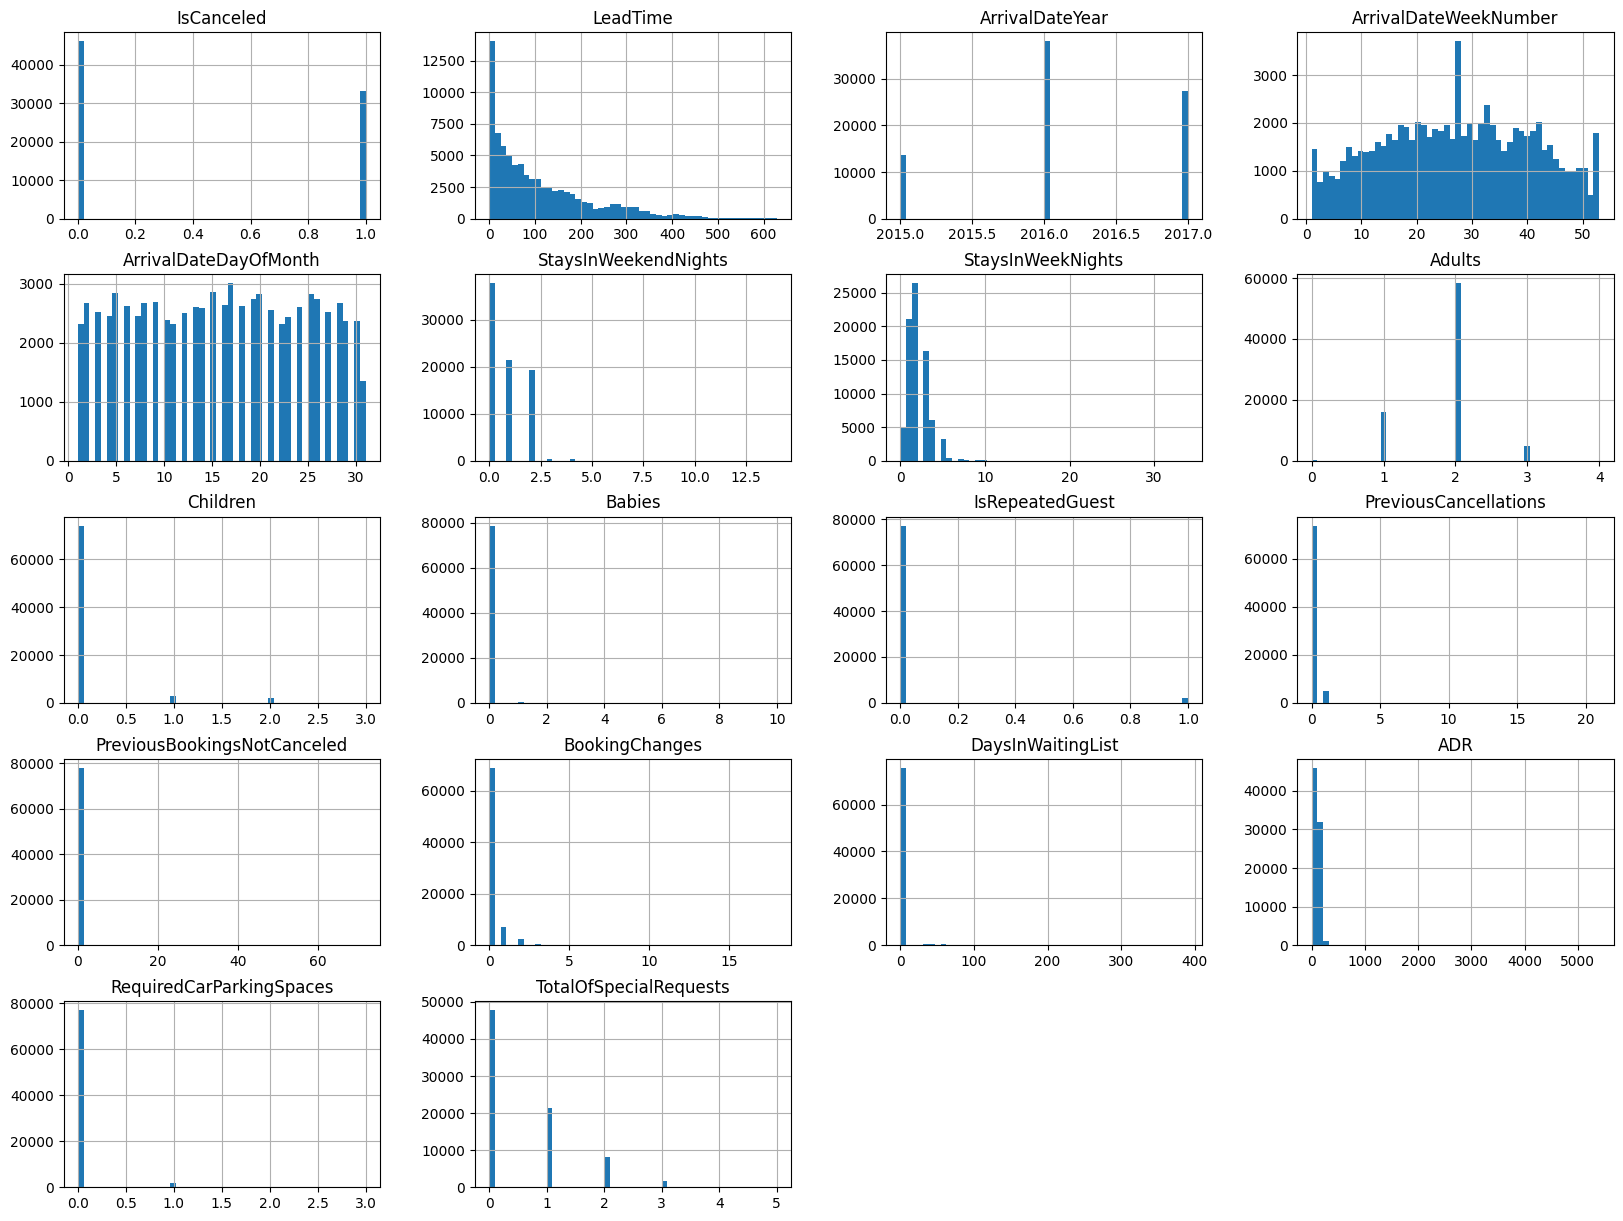

In [235]:
# Histogram of Numerical Variables
h2_df_hist = h2_df_clean.hist(bins=50, figsize=(20, 15))
h2_df_hist